In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.express as px
import os
import warnings
warnings.filterwarnings("ignore")

In [83]:
def get_image_dimensions(image_path):
    img = image.load_img(image_path)
    return img.height, img.width

In [84]:
df = pd.DataFrame(columns = ['path','labels'])
for dirname, _, filenames in os.walk(r"C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dataset\fire_images"):
    for filename in filenames:
        height, width = get_image_dimensions(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname,filename),'fire',height,width]],columns=['path','labels','height','width']))
for dirname, _, filenames in os.walk(r"C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dataset\non_fire_images"):
    for filename in filenames:
        height, width = get_image_dimensions(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname,filename),'non-fire',height,width]],columns = ['path','labels','height','width']))
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

path    labels  height   width
0  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...  non-fire   467.0   700.0
1  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   526.0   736.0
2  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   350.0   590.0
3  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   575.0  1023.0
4  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   675.0  1200.0
5  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   513.0   800.0
6  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   456.0   810.0
7  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   482.0   800.0
8  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   400.0   700.0
9  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire  1242.0  2048.0

In [85]:
fig = px.scatter(data_frame = df,x=df.index,y='labels',color='labels',title='Distribution of fire and non-fire after being randomized')
fig.update_traces(marker_size=2)

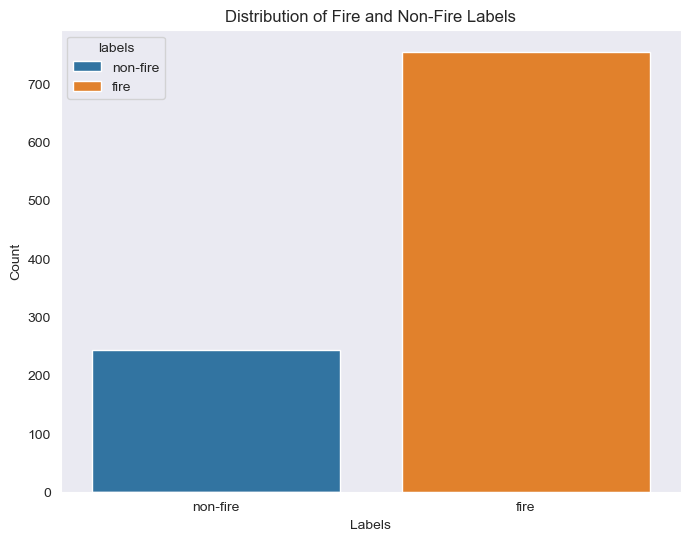

In [86]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='labels', hue = 'labels', dodge = False)
plt.title('Distribution of Fire and Non-Fire Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [87]:
labels_count = df['labels'].value_counts()
fig = px.pie(labels_count, values=labels_count.values, names=labels_count.index, title='Proportion of Fire and Non-Fire Labels')
fig.show()

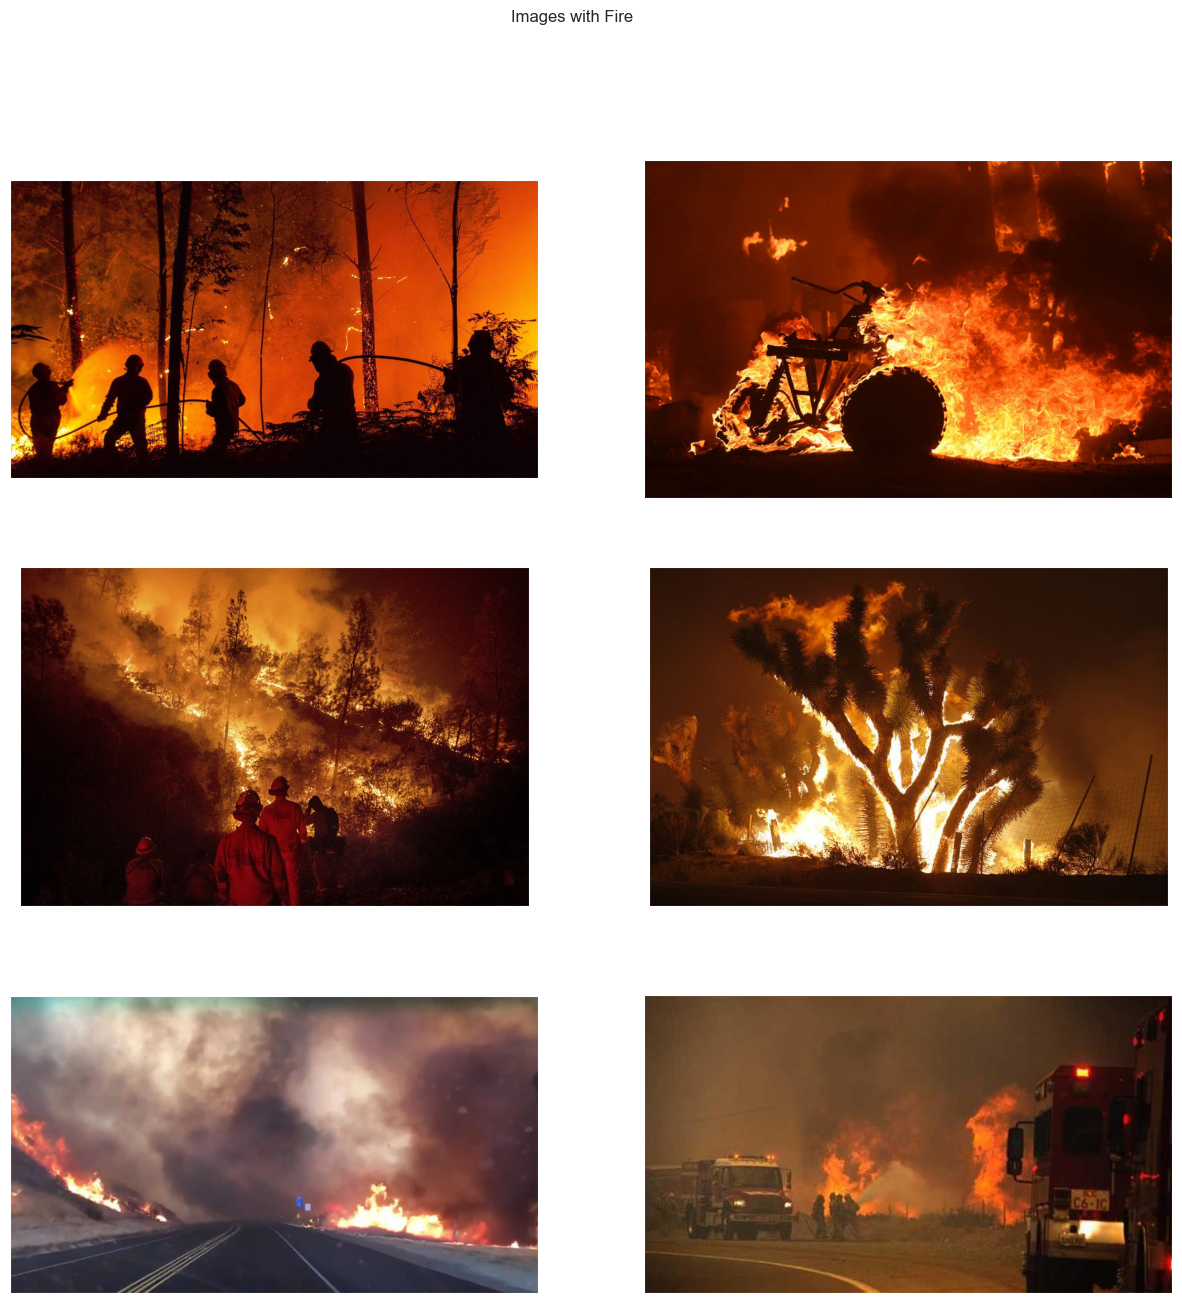

In [88]:
label = 'fire' #label for images with fire
data = df[df['labels'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

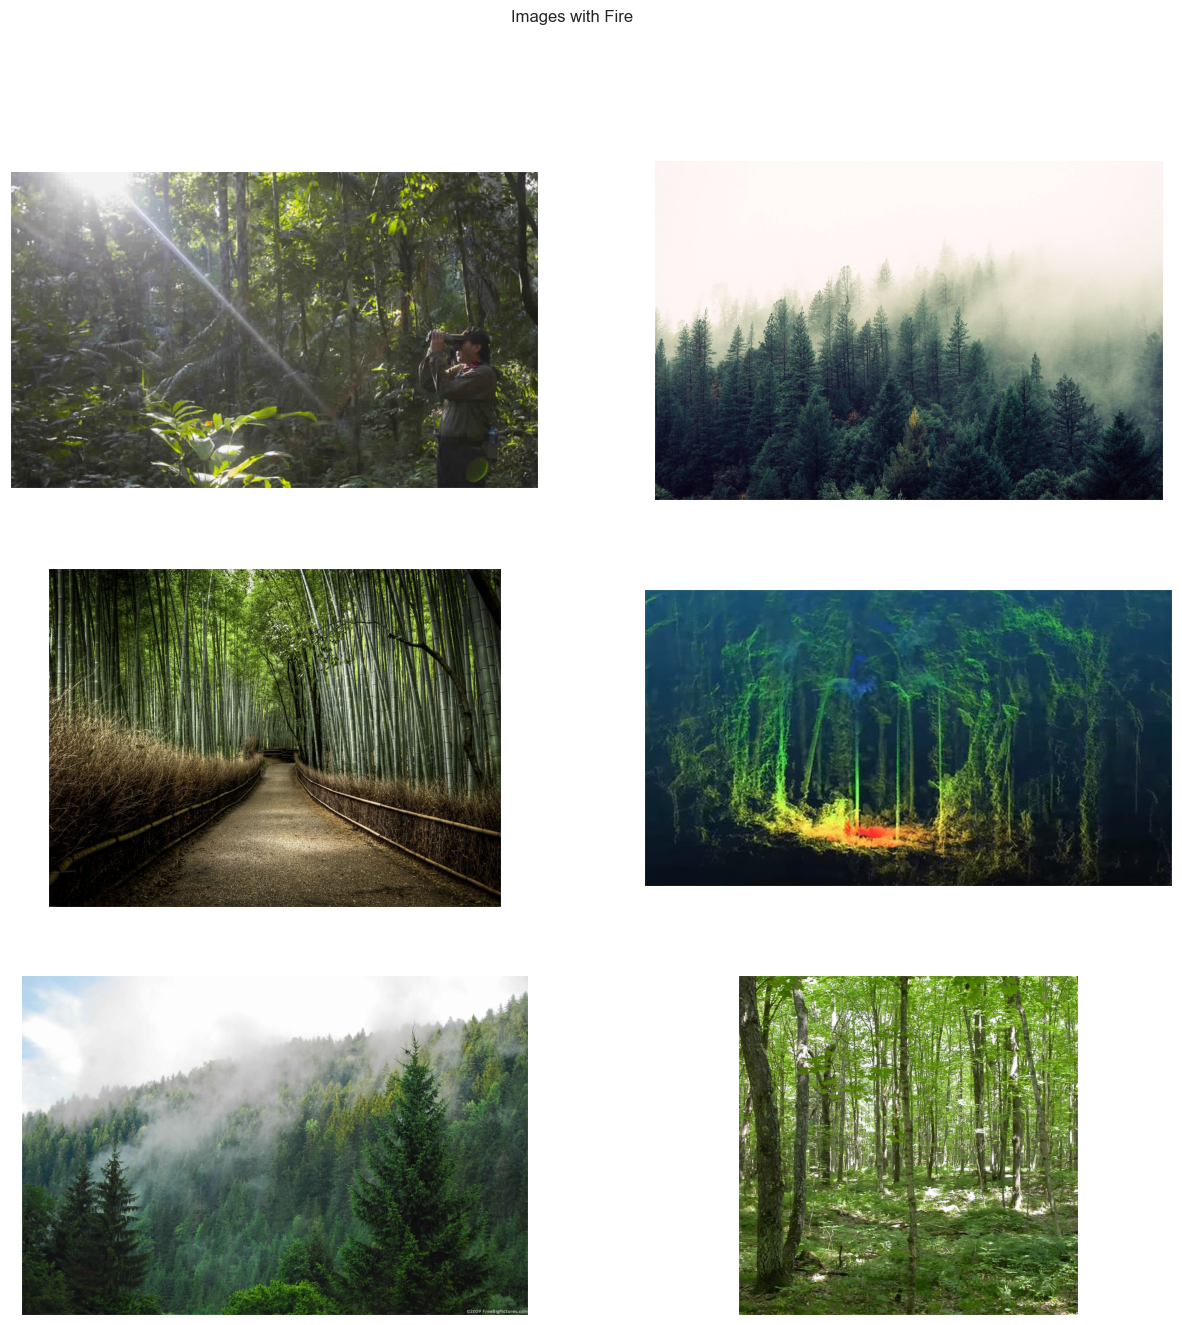

In [89]:
label = 'non-fire' #label for images without fire
data = df[df['labels'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

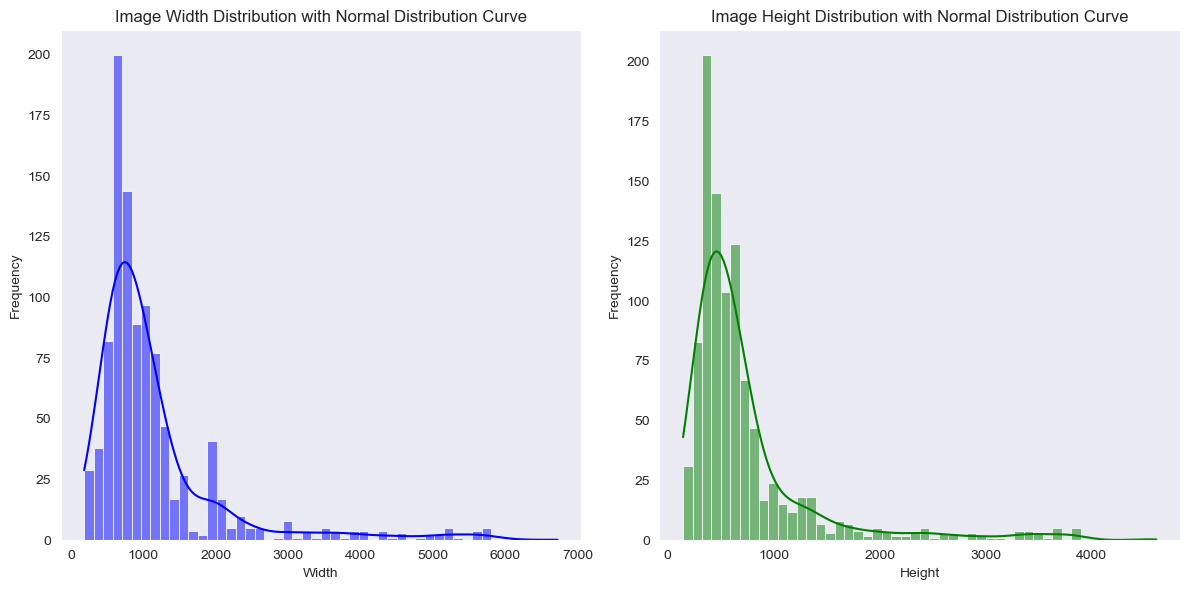

In [90]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='width', bins=50, color='blue', kde=True)
plt.title('Image Width Distribution with Normal Distribution Curve')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='height', bins=50, color='green', kde=True)
plt.title('Image Height Distribution with Normal Distribution Curve')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

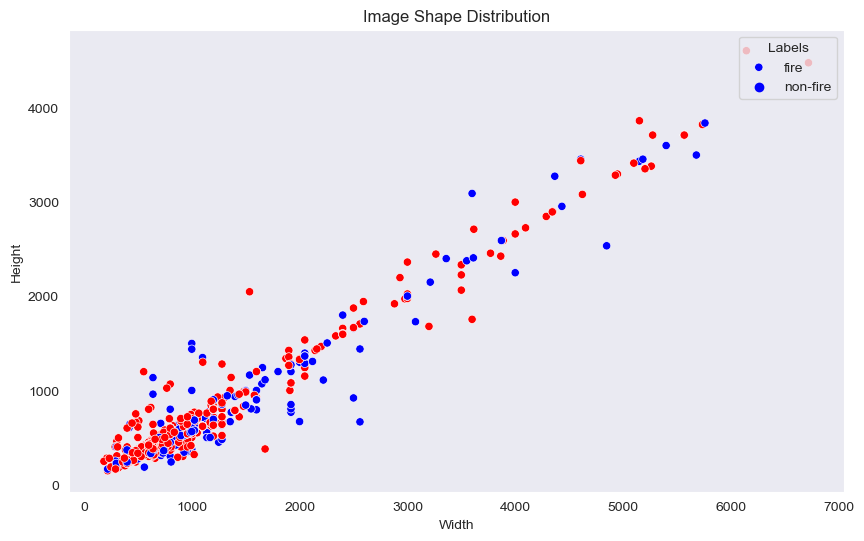

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='width', y='height', hue='labels', palette=['blue', 'red'])
plt.title('Image Shape Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend(title='Labels', loc='upper right', labels=['fire', 'non-fire'])
plt.show()

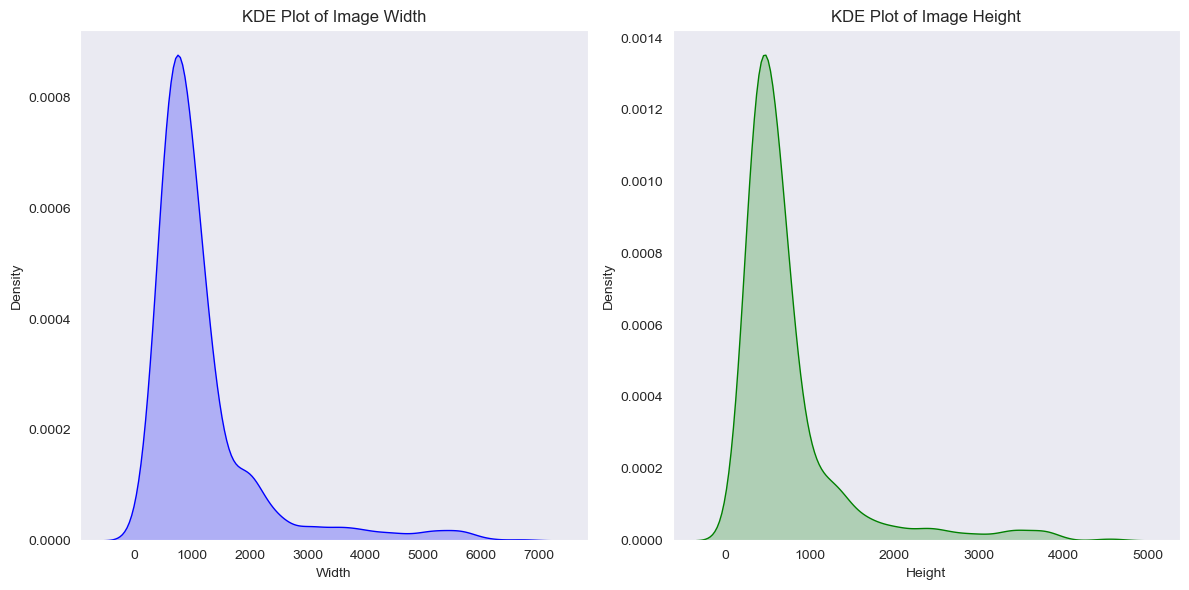

In [92]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='width', fill=True, color='blue')
plt.title('KDE Plot of Image Width')
plt.xlabel('Width')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='height', fill=True, color='green')
plt.title('KDE Plot of Image Height')
plt.xlabel('Height')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

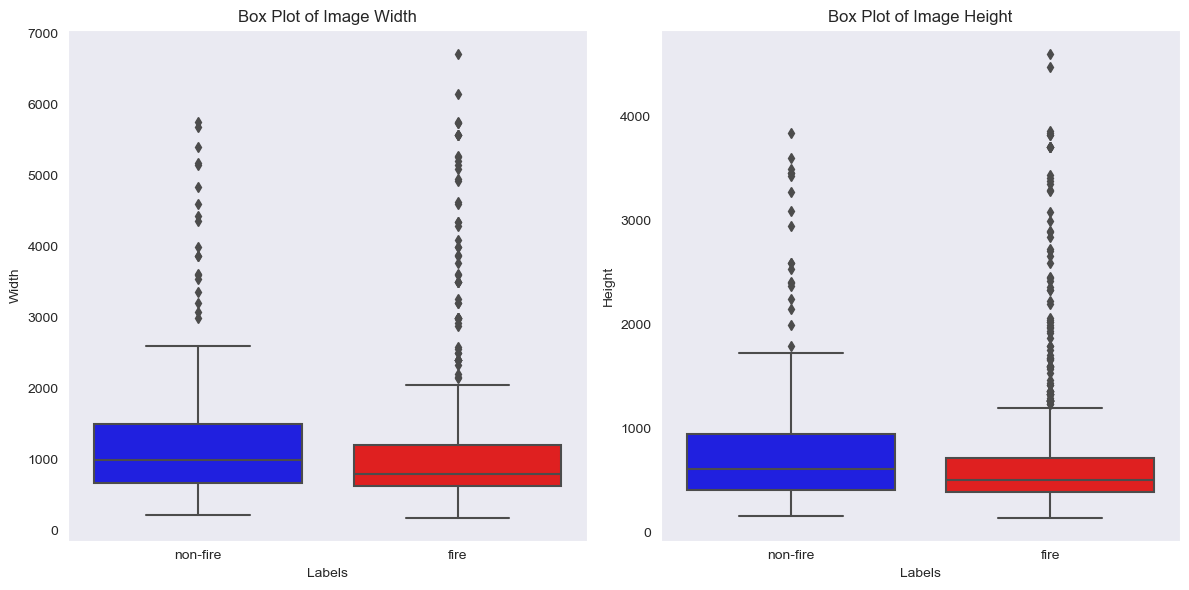

In [93]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='width', x='labels', palette=['blue', 'red'])
plt.title('Box Plot of Image Width')
plt.xlabel('Labels')
plt.ylabel('Width')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='height', x='labels', palette=['blue', 'red'])
plt.title('Box Plot of Image Height')
plt.xlabel('Labels')
plt.ylabel('Height')

plt.tight_layout()
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['path'], df['labels'], test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(244, 244, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Preprocess the images and generate augmented data
image_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = image_generator.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_train, 'labels': y_train}),
                                                      x_col='path', y_col='labels', target_size=(244, 244),
                                                      class_mode='raw', batch_size=250)
test_generator = image_generator.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_test, 'labels': y_test}),
                                                     x_col='path', y_col='labels', target_size=(244, 244),
                                                     class_mode='raw', batch_size=250)

# Train the model
model.fit(train_generator, validation_data=test_generator, epochs=4)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 799 validated image filenames.
Found 200 validated image filenames.
Epoch 1/4
1/4 [======>.......................] - ETA: 1:51 - loss: 0.6833 - accuracy: 0.5918

In [ ]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])